# Chap 4 분류
- 지도학습 : 레이블(Label), 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 분류(Classification) : 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것

#### 분류의 머신러닝 알고리즘
- Naive Bays : 베이즈 통계와 생성 모델에 기반
- Logistic Regression : 독립변수와 종속변수의 선형 관계성에 기반
- Decision Tree : 데이터 균일도에 따른 규칙 기반
- Support Vector Machine : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
- Nearest Neighbor 알고리즘 : 근접 거리 기준
- Neural Network : 심층 연결 기반의 신경망
- Ensemble : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합

#### 앙상블(Ensemble)
- 배깅(Bagging)
    - 랜덤 포레스트(Random Forest)
- 부스팅(Boosting)
    - 그래디언트 부스팅(Gradient Boosting)
    - XgBoost(eXtra Gradient Boost)
    - LightGBM

### 결정트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙 만드는 것

#### 결정 트리의 구조
- 규칙 노드(Decision Node) : 규칙 조건
- 리프 노드(Leaf Node) : 결정된 클래스 값
- 서브 트리(Sub Tree) : 새로운 규칙 조건마다 생성됨

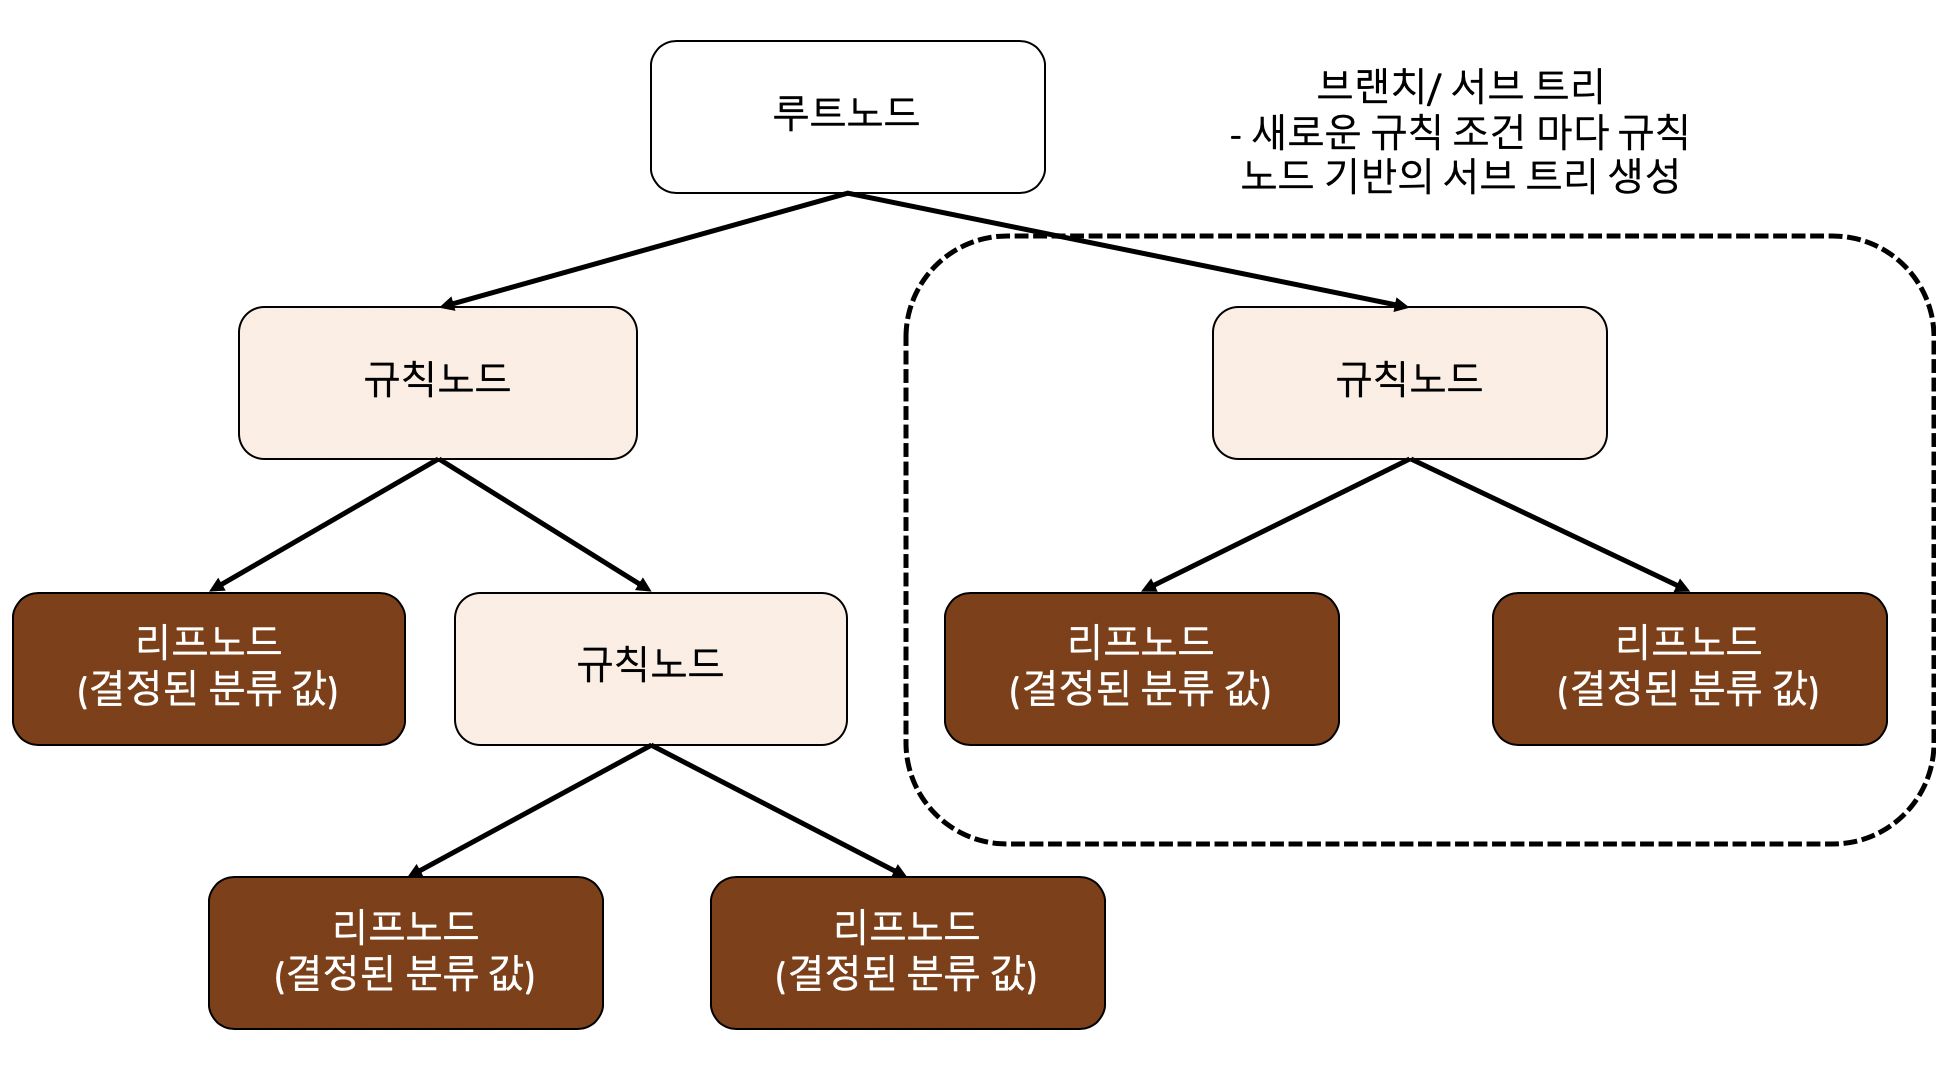

- 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙 정해져야 함
- 어떻게 트리를 분할(split)할 것인가가 중요
- 최대한 균일한 데이터 세트를 구성할 수 있도록 분할

- 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건 만듦
정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건 찾아 서브 데이터 세트 만듦    
→ 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복    
<br>
- 정보 균일도 측정하는 대표적인 방법 : 엔트로피를 이용한 정보 이득(Information Gain)지수, 지니 계수
<br><br>
- 정보이득지수
    - 엔트로피 : 주어진 데이터 집합의 혼잡도
    - 서로 다른 값 섞여 있을 시 엔트로피↑
    - 같은 값 섞여 있을 시 엔트로피↓
    - 정보이득지수 : 1-엔트로피 지수
    - 정보 이득이 높은 속성을 기준으로 분할
<br><br>
- 지니 계수
    - 0이 가장 평등하고 1로 갈수록 불평등
    - 지니 계수 낮을수록 데이터 균일도↑
    - 지니 계수가 낮은 속성을 기준으로 분할

- DecisionTreeClassifier : 지니 계수 이용해 데이터 세트 분할
* 알고리즘    
1) 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인<br>
If True 2-1) 리프 노드로 만들어서 분류 결정<br>
 Else 2-2) 데이터를 분할하는 데 가장 좋은 속성과 분할 기준 찾음(정보이득 or 지니계수 이용)<br>
3) 해당 속성과 분할 기준으로 데이터 분할해 Branch 노드 생성<br>
4) Recursive 하게 모든 데이터 집합의 분류가 결정될 때까지 수행

#### 결정 트리 모델의 특징
- 장점
    - 정보의 '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적
    - 룰이 매우 명확
    - 시각화 가능
    - 스케일링과 정규화 같은 전처리 필요X : 정보의 균일도만 신경 쓰면 되므로
- 단점
    - 과적합으로 정확도↓
    - 트리의 크기 사전에 제한하는 튜닝 필요

#### 결정 트리 파라미터
- DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀)<br><br>
* min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수
    - 과적합 제어하는데 사용됨
    - 디폴트 2
    - 작게 설정할수록 분할되는 노드 많아져 과적합 가능성↑
    - 1로 설정할 경우 분할되는 노드 많아져 과적합 가능성↑
* min_samples_leaf
    - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
    - min_samples_split과 유사하게 과적합 제어 용도
    - 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요
* max_features
    - 최적의 분할을 위해 고려할 최대 피처 개수
    - 디폴트 None
    - 데이터 세트의 모든 피처를 사용해 분할 수행
    - int형으로 지정 시 대상 피처의 개수
    - float형으로 지정 시 전체 피처 중 대상 피처의 퍼센트
    - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)
    - 'auto'로 지정하면 sqrt와 동일
    - 'log'는 전체 피처 중 log2(전체 피처 개수) tjswjd
    - 'None'은 전체 피처 선정
* max_depth
    - 트리의 최대 깊이 규정
    - 디폴트 None
    - None으로 설정 시 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이 증가
    - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할해 과적합할 수 있으므로 적절한 값으로 제어 필요
* max_leaf_nodes
    - 말단 노드(Leaf)의 최대 개수

#### 결정 트리 모델의 시각화
- Graphviz 패키지 사용
- export_graphviz() : 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트 입력
<br><br>
1) https://graphviz.gitlab.io/_pages/Download/Download_windows.html<br>
2) 관리자 권한으로 실행한 Anaconda 콘솔에<br>
```
pip intall graphviz
```
3) 사용자 변수 경로, 시스템 변수 경로에 Graphviz 디렉터리 경로 추가 (자세한 것 책 p190 참조)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [11]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터 로딩 후 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

In [4]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)

In [5]:
import graphviz

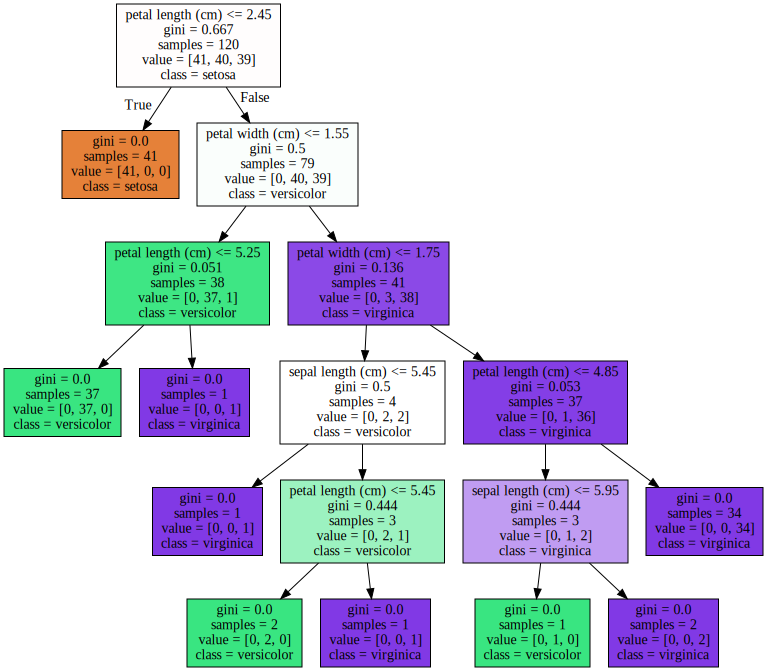

In [6]:
# 위에서 생성한 tree.dot 파일을 Graphviz가 읽어 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 리프 노드
  - 더 이상 자식 노드가 없는 노드
  - 최종 클래스(레이블) 값이 결정된 노드
  - 오직 하나의 클래스 값으로 최종 데이터 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족했을 때
- 브랜치 노드
  - 자식 노드가 있는 노드
  - 자식 노드를 만들기 위한 분할 규칙 조건 있음

- petal length(cm) <= 2.45 처럼 피처의 조건이 있는 경우는 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드
- gini : value=[]로 주어진 데이터 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value=[] : 클래스 값 기반의 데이터 건수
  - ex) value=[41, 40, 39] : Setosa 41개, Vesicolor 40개, Virginica 39개
- 주황색 0:Setosa, 초록색 1: Versicolor, 보라색 2: Virginica
- 색이 짙어질수록 지니 계수↓, 해당 레이블에 속하는 샘플 데이터↑

1번 노드 설명
- samples=120 : 전체 데이터가 120개
- value=[41, 40, 39] : Setosa 41개, Vesicolor 40개, Virginica 39개
- 지니 계수 0.667
- petal length(cm) <= 2.45 의 규칙으로 자식 노드 생성
- class=setosa : 하위 노드 가질 경우 setosa의 개수가 41개로 제일 많음

2번 노드 설명
- 1번 노드 규칙이 True일 경우
- 41개의 샘플 데이터 모두 Setosa이므로 리프 노드, 예측 클래스는 Setosa로 결정
- 지니 계수 0

- 4번 노드를 보면 38개의 샘플 데이터 중 Virginica가 단 1개이고 37개가 Versicolor
- 하지만 이 둘을 구분하기 위해 다시 자식 노드 생성
- 결정 트리는 완벽하게 클래스 값을 구별해내기 위해 트리 노드 계속 만듦<br>
⇒ 과적합




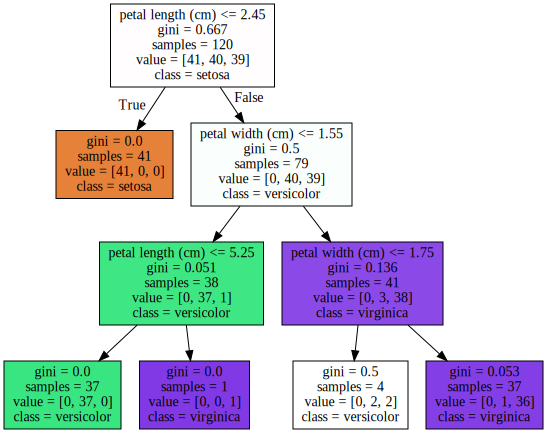

In [7]:
# max_depth=3으로 설정했을 때
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, max_depth=3)

# 붓꽃 데이터 로딩 후 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = "tree2.dot", class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성한 tree.dot 파일을 Graphviz가 읽어 주피터 노트북상에서 시각화
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

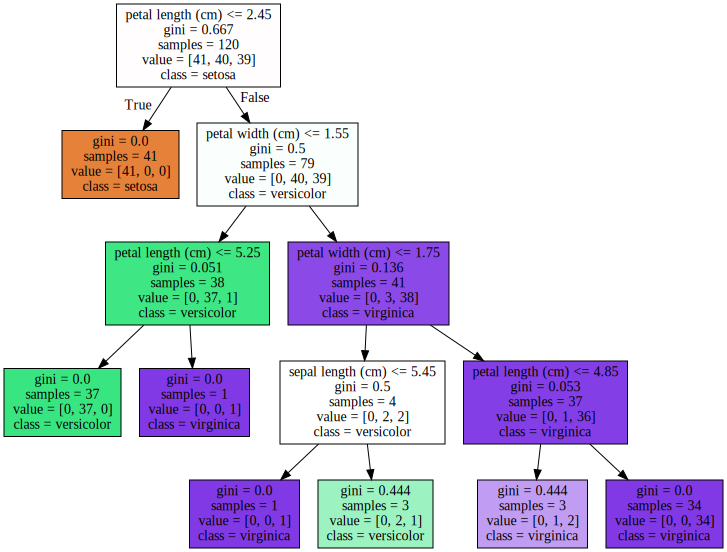

In [9]:
# min_samples_split=4로 설정했을 때
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_split=4)

# 붓꽃 데이터 로딩 후 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = "tree3.dot", class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성한 tree.dot 파일을 Graphviz가 읽어 주피터 노트북상에서 시각화
with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 맨 아래 리프 노드 중 가운데 2개를 보면 value가 [0, 2, 1]과 [0, 1, 2]로 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드가 됨
- min_samples_splits=4, 즉 자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요한데 3개밖에 없으므로 분리X

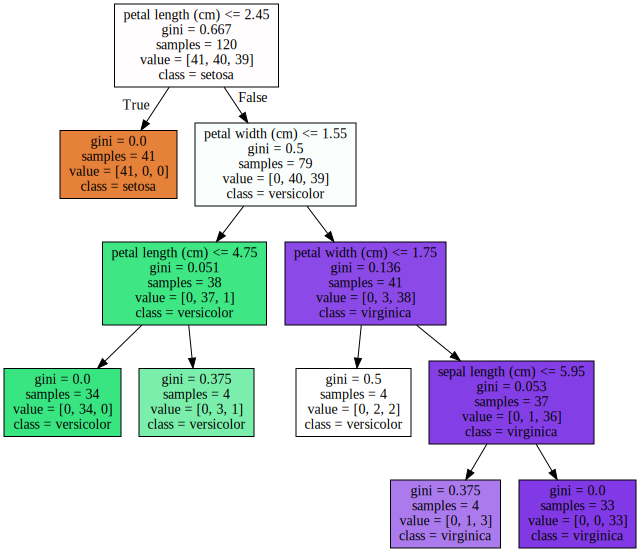

In [10]:
# min_samples_leaf=4인 경우
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156, min_samples_leaf=4)

# 붓꽃 데이터 로딩 후 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = "tree4.dot", class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names, impurity=True, filled=True)

# 위에서 생성한 tree.dot 파일을 Graphviz가 읽어 주피터 노트북상에서 시각화
with open("tree4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- sample이 4 이상인 노드는 리프 클래스 노드가 될 수 있음

**feature_importances_ 속성**
- 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표 제공
- ndarray 형태로 값 반환하며 피처 순서대로 값 할당
- 값이 높을수록 해당 피처 중요도↑

In [13]:
# 피처별로 중요도 값 매핑하고 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


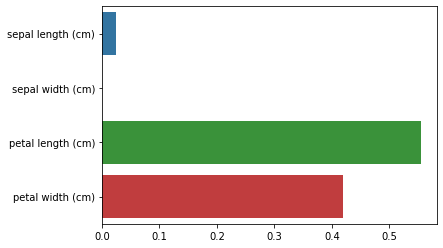

In [15]:
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

petal_length가 가장 피처 중요도가 높음

#### 결정 트리 과적합(Overfitting)
- 결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지
- 이로 인한 과적합 문제를 시각화
- make_classification() : 분류를 위한 테스트용 데이터 쉽게 생성하도록

In [16]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

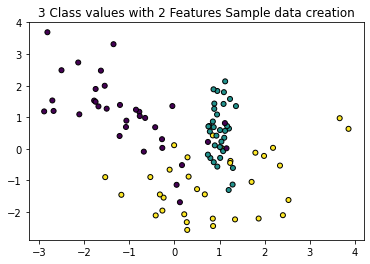

In [17]:
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [21]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

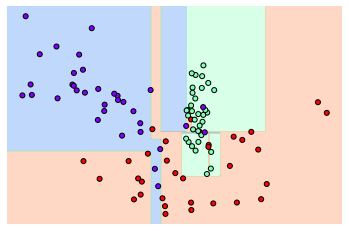

In [22]:
# X_features와 y_labels 데이터 세트 기반으로 결정 트리 학습
# visualize_boundary() : 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내줌
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아짐

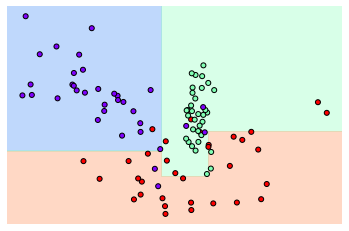

In [23]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

#### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
- UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식(Human Activity Recognition) 데이터 세트에 대한 예측 분류 수행
- 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터
- README.txt, features_info.txt : 데이터 세트와 피처에 대한 간략한 설명
- features.txt : 피처의 이름
- activity_labels.txt : 동작 레이블 값에 대한 설명
- 피처 561개, 공백으로 분리

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음<br>
<br>
features_info.txt 파일은 중복된 피처명 가지고 있음<br>
→ 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2를 추가로 부여해 변경한 뒤 데이터를 DataFrame에 로드

In [3]:
# 중복된 피처명 얼마나 있는지 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


총 42개의 피처명이 중복됨

In [7]:
# 중복된 피처명에 대해 원본 피처명에 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame 반환하는 함수
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                             if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [3]:
import pandas as pd

In [8]:
# DataFrame 생성하는 로직
def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_Feature_name_df() 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 Dataframe 모두 반환
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [10]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


- 학습 데이터 세트 : 7352개의 레코드, 561개의 피처
- 피처 : 모두 float형의 숫자 형

In [11]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [12]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [13]:
# 동작 예측 분류 수행하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


- 정확도 : 약 85.48%

GridSearchCV 이용해 사이킷런 결정 트리의 깊이를 조절 할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능 확인하기

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.7min finished


GridSearchCV 최고 평균 정확도 수치: 0.851344
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


max_depth가 16일 때 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.13%

max_depth 값에 따라 어떻게 예측 성능이 변했는지 GridSearchCV 객체의 cv_results_ 속성을 통해 살펴보자
- cv_results_ : CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치 가지고 있음

In [18]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [22]:
# 별도의 테스트 데이터 세트에서 결정 트리의 정확도 측정해보기
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 에측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


max_depth가 8일 때 87.07%로 가장 정확도가 높음
- 깊이가 깊어질수록 정확도↓

In [23]:
# max_depth와 min_samples_split 같이 변경하면서 정확도 성능 튜닝
params = {
    'max_depth':[8, 12, 16, 20],
    'min_samples_split':[16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.854879
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth가 8, min_samples_split이 16일 때 가장 높은 정확도인 약 85.5%

In [24]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


max_depth 8, min_samples_split 16일 때 정확도 약 87.17%

In [25]:
# 각 피처의 중요도 feature_importances_ 속성을 이용해 알아보기
import seaborn as sns

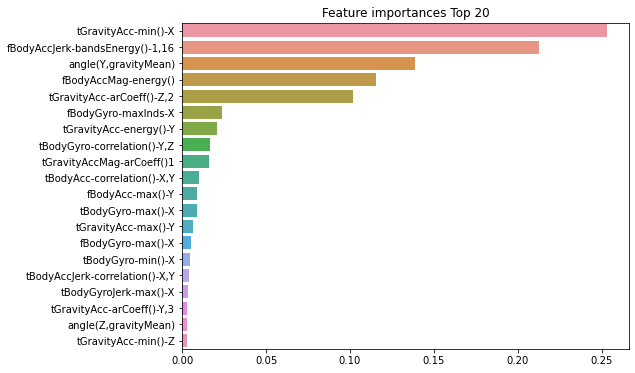

In [30]:
ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬 쉽게 하고 Seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 앙상블 학습
- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성 높은 예측값 얻는 것이 목표
- 랜덤 포레스트, 그래디언트 부스팅 알고리즘
- XGboost, LightGBM
<br><br>
- 앙상블 학습 유형
    - 보팅(Voting)
        - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
        - 서로 다른 알고리즘을 가진 분류기 결합
    - 배깅(Bagging)
        - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
        - 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습 수행
        - 랜덤 포레스트 알고리즘
    - 부스팅(Boosting)
        - 여러 개의 분류기가 순차적으로 학습 수행
        - 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서 가충치(weight) 부여
        - 그래디언트 부스트, XGBoost, LightGBM



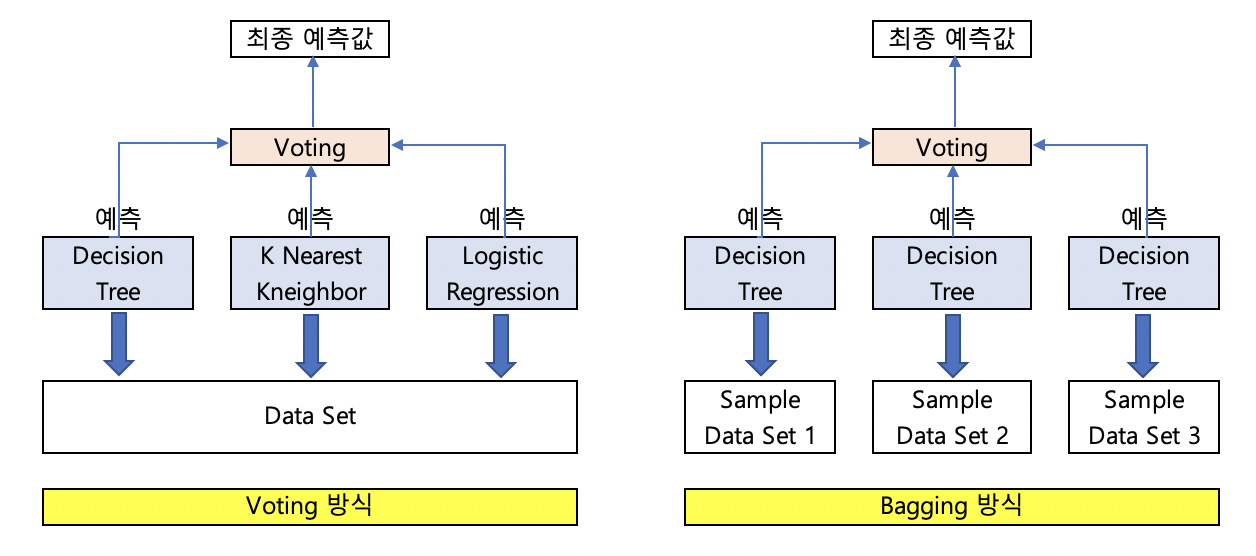

#### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
- 하드 보팅
    - 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅
    - 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
    - 보통 소프트 보팅이 예측 성능이 더 좋아 많이 사용됨

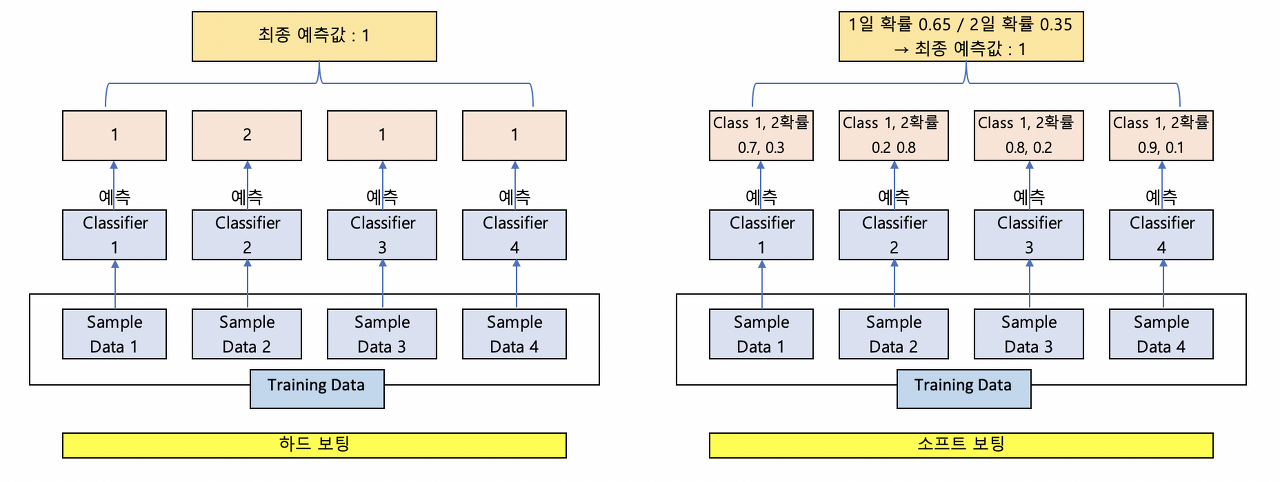

#### 보팅 분류기(Voting Classifier)
- VotingClassifier 클래스 제공

보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석해 보자
- 위스콘신 유방암 데이터 세트 : 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
- 로지스틱 회귀, KNN 기반으로 보팅 분류기 생성

In [31]:
import pandas as pd

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


VotingClassifier의 주요 생성 인자
- estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
- voting : 'hard' 시 하드 보팅, 'soft'시 소프트 보팅 방식, 디폴트 'hard

In [37]:
# 개별 모델 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voing 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voing 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기의 정확도가 살짝 높게 나왔지만 무조건 기반 분류기보다 예측 성능이 향상되지는 않음
- 결정 트리 알고리즘의 장점 그대로 취하고 단점 보완하면서 편향-분산 트레이드오프의 효과 극대화할 수 있다!

### 랜덤 포레스트
- 배깅 : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
- 빠른 수행 속도, 다양한 영역에서 높은 예측 성능
- 결정 트리가 기반 알고리즘
- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트 = 부트스트래핑(bootstrapping) 분할 방식<br>
*Bagging은 bootstrap aggregating의 줄임말*
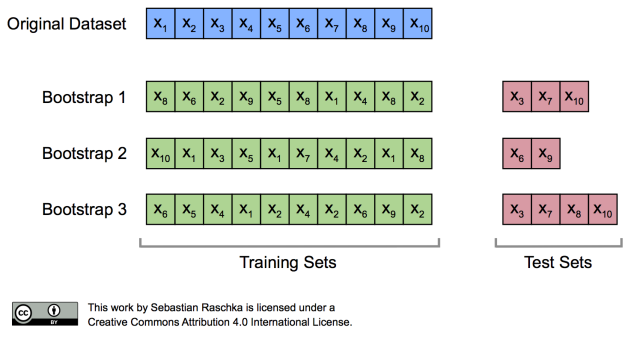

- RandomForestClassifier

사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측해보자

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [39]:
# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
- 단점 : 하이퍼 파라미터多, 튜닝 위한 시간 소요多
- n_estimators
    - 랜덤 포레스트에서 결정 트리의 개수 지정
    - 디폴트 10개
    - 많이 설정할수록 좋은 성능 기대할 수 있지만 무조건 향상하는건 X
    - 늘릴수록 학습 수행 시간↑
- max_features
    - 디폴트 'auto'('sqrt')
- max_depth
- min_samples_leaf

GridSearchCV를 이용해 랜덤 포레스트 하이퍼 파라미터 튜닝
- n_estimators 100, CV=2
- CPU 병렬 처리도 효과적으로 수행되어 빠른 학습 가능

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


n_estimators가 100, max_depth가 10, min_samples_leaf가 8, min_samples_split이 8일 때 약 91.68%의 정확도가 측정됨

In [43]:
# n_estimators=300으로
rf_clf1 = RandomForestClassifier(n_estimators=300,max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


In [44]:
# 피처 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

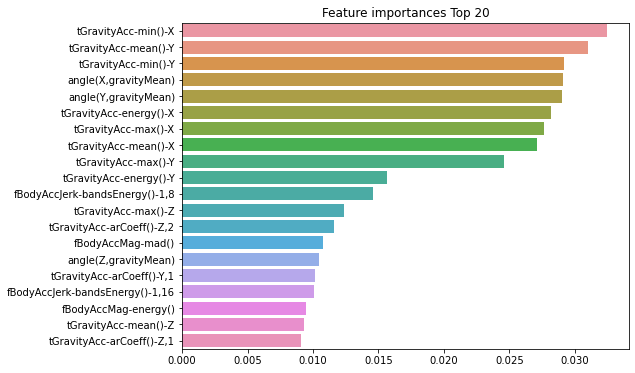

In [45]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### GBM(Gradient Boosting Machine)
- 부스팅 : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- AdaBoost : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
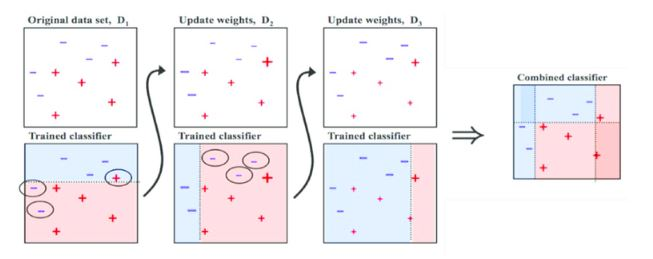
- 그래디언트 부스트
    - 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용
    - 오류 값 : 실제 값 - 예측 값 chlthghkgksms qkdgidtjd
    - GradientBoostingClassifier

GBM을 이용해 사용자 행동 데이터 세트 예측 분류

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f} 초'.format(time.time()-start_time))

기본 하이퍼 파라미터만으로 93.76%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능 나타냄
- 수행 시간↑, 하이퍼 파라미터 튜닝 노력 필요
- 병렬 처리 지원X

#### GBM 하이퍼 파라미터 및 튜닝
- loss
    - 경사 하강법에서 사용할 비용 함수
    - 보통 기본값인 'deviance' 그대로 적용
- learning_rate
    - GBM이 학습을 진행할 때마다 적용하는 학습률
    - Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
    - 0~1 사이의 값 지정, 디폴트 0.1
    - 너무 작은 값 적용 시 업데이트 되는 값이 작아져 최소 오류 값을 찾아 예측 성능이 높아질 가능성 높음
    - 많은 weak learner는 순차적인 반복이 필요해 수행 시간↑
    - 너무 작게 설정 시 모든 weak learner의 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있음
    - 큰 값 적용 시 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성↑ but 빠른 수행
    - 따라서 n_estimators와 상호 보완적으로 조합해 사용
- n_estimators
    - weak learner의 개수
    - 개수가 많을수록 예측 성능이 일정 수준까지 좋아질 수 있음 but 오래 걸림
    - 기본값 100
- subsample
    - weak learner가 학습에 사용하는 데이터의 샘플링 비율
    - 기본값 1, 전체 학습 데이터를 기반으로 학습한다는 의미
    - 과적합이 염려되는 경우 subsample을 1보다 작은 갑승로 설정

In [ ]:
# GridSearchCV를 이용해 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators':[100, 500],
    'learning_rate':[0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))